<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_1/Assignment_1/Assignment_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.1
Zachariah Freitas
2022-09-06

## Import required packages

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.3 MB/s 


In [60]:
# Import required packages
%matplotlib inline

import numpy as np
import pandas as pd
# Turn off warning messages
pd.options.mode.chained_assignment = None # default = 'warn'

import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Book Authors package to gain access to datasets from book.
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [4]:
# Get data
cbc_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_1/Assignment_1/CharlesBookClub.csv')
print(cbc_df.shape)
print(cbc_df.columns)
cbc_df

(4000, 24)
Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')


,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,32950,0,141,2,2,6,0,0,0,...,0,0,0,0,0,4,1,2,0,1
3996,3997,32954,1,357,16,9,52,1,1,2,...,0,0,0,0,1,5,4,3,0,1
3997,3998,32955,0,48,12,1,12,0,0,0,...,0,0,0,0,0,2,3,1,0,1
3998,3999,32976,0,214,14,7,38,1,1,3,...,0,0,0,0,0,5,4,3,0,1


### Question 1
Partition the data into training (60%) and validation (40%). Use seed = 1.



In [6]:
trainData, testData = train_test_split(cbc_df, test_size=0.4, random_state=1)
print(trainData.shape, testData.shape)

(2400, 24) (1600, 24)


### Question 1.1
1.1. What is the response rate for the training data customers taken as a whole? What is the response rate for each of the 4 × 5 × 3 = 60 combinations of RFM categories? Which combinations have response rates in the training data that are above the overall response in the training data? (10 points)

In [44]:
# What is the response rate for the training data customers taken as a whole?
avg_rr = trainData['Florence'].mean()
avg_rr

0.08833333333333333

In [45]:
# What is the response rate for each of the 4 × 5 × 3 = 60 combinations of RFM categories?
train_RFM_avg_rr = trainData.groupby(
    by=['Mcode','Rcode','Fcode'], 
    observed=False, 
    dropna=False)['Florence'].mean().reset_index().rename(
        columns={
            "Florence": "Response_Rate",
            }
            )
train_RFM_avg_rr

,Mcode,Rcode,Fcode,Response_Rate
0,1,1,1,0.000000
1,1,2,1,0.400000
2,1,3,1,0.100000
3,1,4,1,0.000000
4,2,1,1,0.000000
5,2,1,2,0.666667
6,2,2,1,0.333333
7,2,2,2,0.142857
8,2,3,1,0.090909
9,2,3,2,0.043478


In [46]:
# Which combinations have response rates in the training data that are above the overall response in the training data?
high_rr_subset = train_RFM_avg_rr.loc[train_RFM_avg_rr['Response_Rate'] > avg_rr]
high_rr_subset.sort_values(by='Response_Rate', ascending=False)

,Mcode,Rcode,Fcode,Response_Rate
5,2,1,2,0.666667
1,1,2,1,0.400000
6,2,2,1,0.333333
14,3,1,3,0.333333
17,3,2,3,0.333333
24,4,1,1,0.200000
29,4,2,3,0.200000
41,5,2,3,0.177778
36,5,1,1,0.173913
39,5,2,1,0.172414


### Question 1.2
1.2. Suppose that we decide to send promotional mail only to the “above-average” RFM 
combinations identified in part 1. Compute the response rate in the validation data using 
these combinations. (10 points)

In [47]:
# Suppose that we decide to send promotional mail only to the “above-average” RFM combinations identified in part 1. 
# Compute the response rate in the validation data using these combinations. (10 points)
test_high_rr_tbl = pd.merge(testData, high_rr_subset, how='inner', left_on= ['Mcode','Rcode','Fcode'], right_on = ['Mcode','Rcode','Fcode'])
test_high_rr_tbl['Florence'].mean()

0.08745874587458746

### Question 2
The k-NN technique can be used to create segments based on product proximity to 
similar products of the products offered as well as the propensity to purchase (as measured by the RFM variables). For The Art History of Florence, a possible 
segmentation by product proximity could be created using the following variables: 
* R: recency—months since last purchase
* F: frequency—total number of past purchases
* M: monetary—total money (in dollars) spent on books
* FirstPurch: months since first purchase
Page 7 of 7 
* RelatedPurch: total number of past purchases of related books (i.e., sum of 
purchases from the art and geography categories and of titles Secrets of Italian Cooking, Historical Atlas of Italy, and Italian Art)

In [49]:
testData.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

In [55]:
# Prep data for KNN model
scaler = preprocessing.StandardScaler()
# Fit the scaler in trianing dataset.
scaler.fit(trainData[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']])  # Note the use of an array of column names

# Transform the full dataset
cbc_df_Norm = pd.concat([pd.DataFrame(scaler.transform(cbc_df[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']]), 
                                    columns=['R', 'F', 'M', 'FirstPurch', 'Related Purchase']),
                       cbc_df[['Florence']]], axis=1)

# Break-out the test and train datasets based on indexes
trainNorm = cbc_df_Norm.iloc[trainData.index]
display(trainNorm)
validNorm = cbc_df_Norm.iloc[testData.index]
display(validNorm)


,R,F,M,FirstPurch,Related Purchase,Florence
3999,-0.417289,-0.526337,-0.905340,-0.784969,0.112519,0
2745,2.033746,0.349270,-0.549372,0.857178,1.784631,0
492,0.808229,1.224876,1.645760,2.170895,1.784631,0
961,1.298436,-0.818206,-1.201979,-0.128110,-0.723537,0
2939,-0.662392,-0.818206,0.607522,-1.003922,-0.723537,0
...,...,...,...,...,...,...
3839,0.072918,-0.818206,-0.490044,-0.675493,-0.723537,0
1096,0.808229,0.349270,1.428225,0.638225,0.112519,0
3980,0.072918,2.392352,1.922624,2.280372,0.112519,0
235,-0.417289,-0.818206,-0.588924,-0.894445,-0.723537,0


,R,F,M,FirstPurch,Related Purchase,Florence
200,0.563125,-0.818206,-0.025309,-0.456540,-0.723537,0
1078,-0.172185,-0.818206,0.162563,-0.784969,-0.723537,0
610,-1.152599,0.933007,-0.410940,0.638225,0.112519,0
2159,-0.172185,2.100483,1.705088,0.966654,-0.723537,0
1169,-0.907496,-0.818206,-1.023996,-1.113398,-0.723537,1
...,...,...,...,...,...,...
556,1.788643,-0.526337,0.558082,0.200319,0.948575,0
1265,0.072918,-0.526337,-1.221755,-0.566016,-0.723537,0
3688,0.072918,-0.526337,-1.211867,-0.347063,0.112519,0
3993,-0.907496,-0.818206,-0.677916,-1.113398,-0.723537,0


### Question 2.1
Use the k-NN approach with uniform weights to classify cases with k = 1, 2, …, 11, using Florence as the outcome variable. Based on the validation set, find the best k. Remember to normalize all five variables. Create a lift curve for the best k model, and report the expected lift for an equal number of customers from the validation dataset. (12 points) \
Hint: You can check [sklearn.neighbors.KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to assign different weights function. 


In [62]:
train_X = trainNorm.drop('Florence', axis=1)
train_y = trainNorm['Florence']
valid_X = validNorm.drop('Florence', axis=1)
valid_y = validNorm['Florence']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(train_X, train_y)
    # Save Validation Results:
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame and show
results = pd.DataFrame(results)
print('accuracy by k')
display(results)

accuracy by k


,k,accuracy
0,1,0.845625
1,2,0.912500
2,3,0.895000
3,4,0.917500
4,5,0.913750
5,6,0.919375
6,7,0.916875
7,8,0.918750
8,9,0.916875
9,10,0.920000


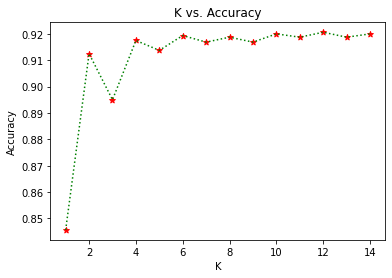

In [63]:
# show accuracy by k
plt.plot(results.k, results.accuracy, linestyle=':', c='green')
plt.title('K vs. Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

noteworthy_points = results[results['accuracy'] >= .8]
plt.scatter(noteworthy_points.k, noteworthy_points.accuracy, c='red', marker='*')

plt.show()

In [70]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(train_X, train_y)
preds = knn.predict(valid_X)
preds_prob = knn.predict_proba(valid_X)

In [83]:
full_result = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in preds_prob],
                            'p(1)': [p[1] for p in preds_prob],
                            'predicted': knn.predict(valid_X)})

full_result = full_result.sort_values(by=['p(1)'], ascending=False)

In [84]:
full_result

,actual,p(0),p(1),predicted
613,1,0.166667,0.833333,1
1610,0,0.166667,0.833333,1
988,0,0.333333,0.666667,1
305,0,0.333333,0.666667,1
2379,0,0.333333,0.666667,1
...,...,...,...,...
3259,0,1.000000,0.000000,0
3689,0,1.000000,0.000000,0
2062,0,1.000000,0.000000,0
3407,0,1.000000,0.000000,0


In [85]:
# confusion matrix
classificationSummary(full_result.actual, full_result.predicted)

Confusion Matrix (Accuracy 0.9194)

       Prediction
Actual    0    1
     0 1470    4
     1  125    1


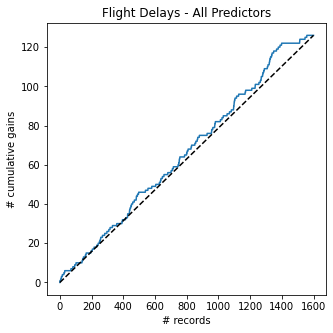

In [86]:
# Lift Chart
ax0 = gainsChart(full_result.actual, figsize=[5, 5])
ax0.set_title('Flight Delays - All Predictors')
plt.show()

In [ ]:
# confusion matrix
classificationSummary(full_result.actual, full_result.predicted, class_names=classes)

ax0 = gainsChart(full_result.actual, figsize=[5, 5])
ax0.set_title('Flight Delays - All Predictors')
plt.show()

### Question 2.2
The k-NN prediction algorithm gives a numerical value, which is a weighted 
average of the values of the Florence variable for the k-NN with weights that are inversely proportional to distance. Using the best k that you calculated above with k-NN classification, now run a model with k-NN prediction and compute a lift curve for the validation data. Use all 5 predictors and normalized data. What is the range within which a prediction will fall? How does this result compare to the output you get with the k-NN classification? (10 points) \
Hint: You can check [sklearn.neighbors.KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to assign different weights 
function. 

### Question 3
 The logistic regression model offers a powerful method for modeling response because it yields well-defined purchase probabilities. The model is especially attractive in consumer-choice settings because it can be derived from the random utility theory of consumer behavior. \
Use the training set data of 2400 records to construct two logistic regression models with Florence as the outcome variable and each of the following sets of predictors: (10 points) \
* The full set of 16 predictors in the dataset
* A subset of predictors that you judge to be the best

### Question 3.1
If the cutoff criterion for a campaign is a 30% likelihood of a purchase, find the customers in the validation data that would be targeted and count the number of buyers in this set. (10 points)

### Question 3.2
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (18 points)